In [1]:
import matplotlib.pyplot as plt 
import json
from pathlib import Path
import numpy as np
import pandas as pd


In [2]:
result_figs = Path("results_fig/")
result_figs.mkdir(exist_ok=True, parents=True)

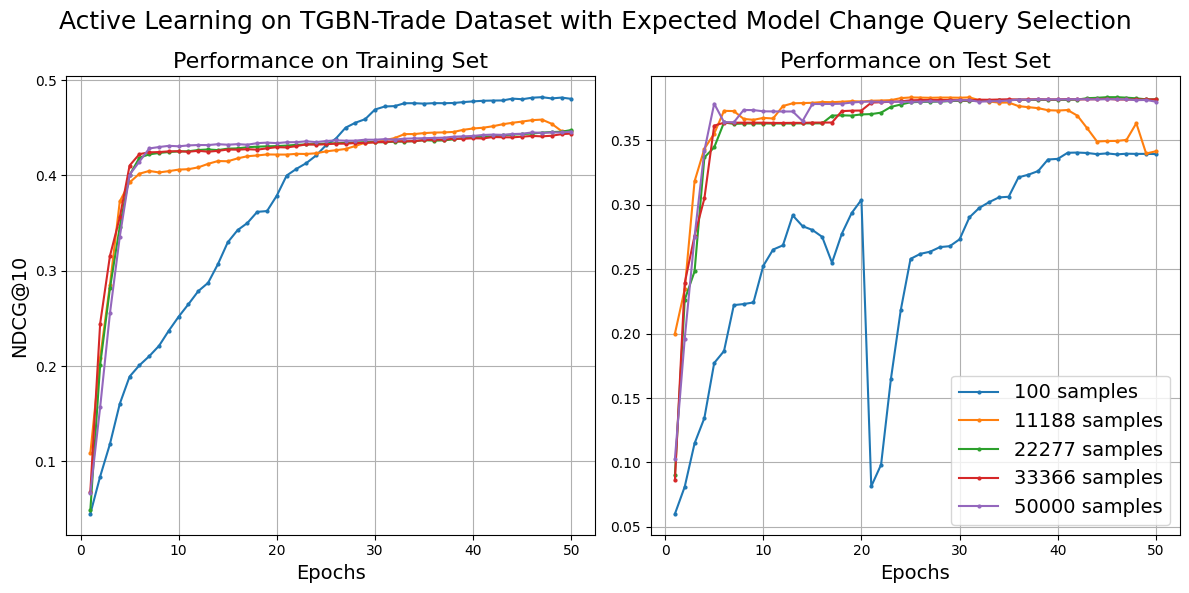

In [13]:
data = {}
data_dir = Path("data/")
fps = data_dir.glob("expected_model_change*.json")

# Loop through files in the directory
for fp in fps:
    nsamples = fp.stem.split("_")[4].replace('samples', '')
    with open(fp, "r") as f:
        scores = json.load(f)
    data[int(nsamples)] = scores
data = dict(sorted(data.items()))

keys = list(data)
keys = keys[::2][:-1] + [keys[-1]]
data = {key: data[key] for key in keys}

plt.figure(figsize=(12, 6))

# Plot for train scores
plt.subplot(1, 2, 1)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['train_scores']) + 1)
    plt.plot(epochs, scores['train_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Training Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('NDCG@10', fontsize=14)
plt.grid()

# Plot for test scores
plt.subplot(1, 2, 2)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['test_scores']) + 1)
    plt.plot(epochs, scores['test_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Test Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

title = "Active Learning on TGBN-Trade Dataset with Expected Model Change Query Selection"
plt.suptitle(title, fontsize=18)

plt.tight_layout()

fp = result_figs / ("_".join(title.split(" "))+".png")
plt.savefig(fp, dpi=300)

plt.show()

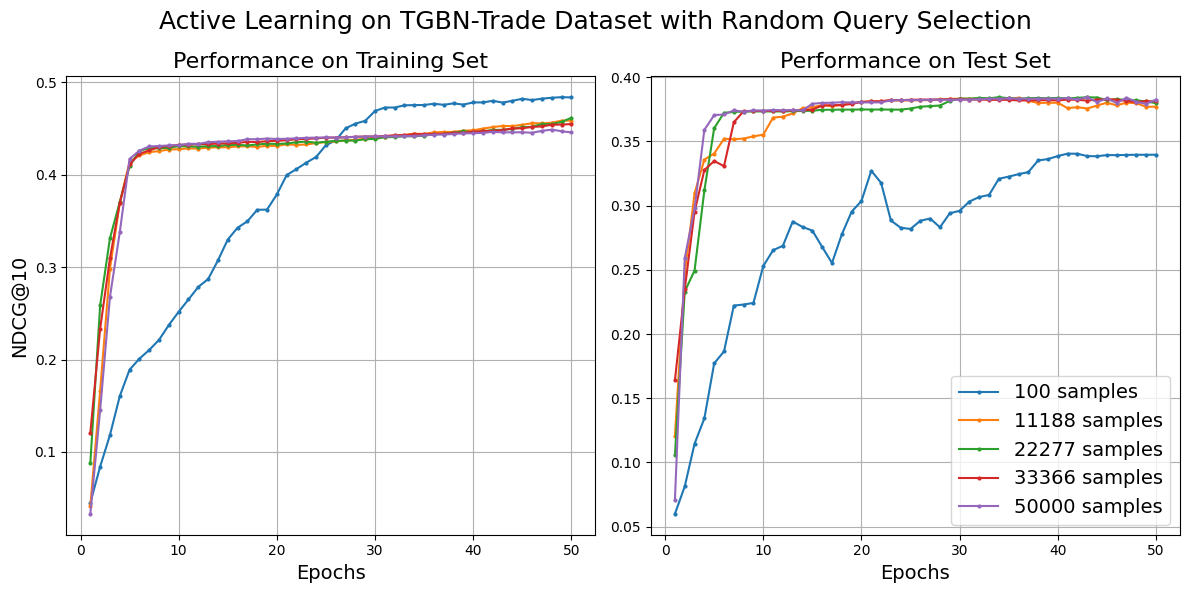

In [14]:
data = {}
data_dir = Path("data/")
fps = list(data_dir.glob("random_epochs*samples.json"))

# Loop through files in the directory
for fp in fps:
    nsamples = fp.stem.split("_")[2].replace('samples', '')
    with open(fp, "r") as f:
        scores = json.load(f)
    data[int(nsamples)] = scores
data = dict(sorted(data.items()))

keys = list(data)
keys = keys[::2][:-1] + [keys[-1]]
data = {key: data[key] for key in keys}

plt.figure(figsize=(12, 6))

# Plot for train scores
plt.subplot(1, 2, 1)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['train_scores']) + 1)
    plt.plot(epochs, scores['train_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Training Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('NDCG@10', fontsize=14)
plt.grid()

# Plot for test scores
plt.subplot(1, 2, 2)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['test_scores']) + 1)
    plt.plot(epochs, scores['test_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Test Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

title = "Active Learning on TGBN-Trade Dataset with Random Query Selection"
plt.suptitle(title, fontsize=18)

plt.tight_layout()
fp = result_figs / ("_".join(title.split(" "))+".png")
plt.savefig(fp, dpi=300)

plt.show()

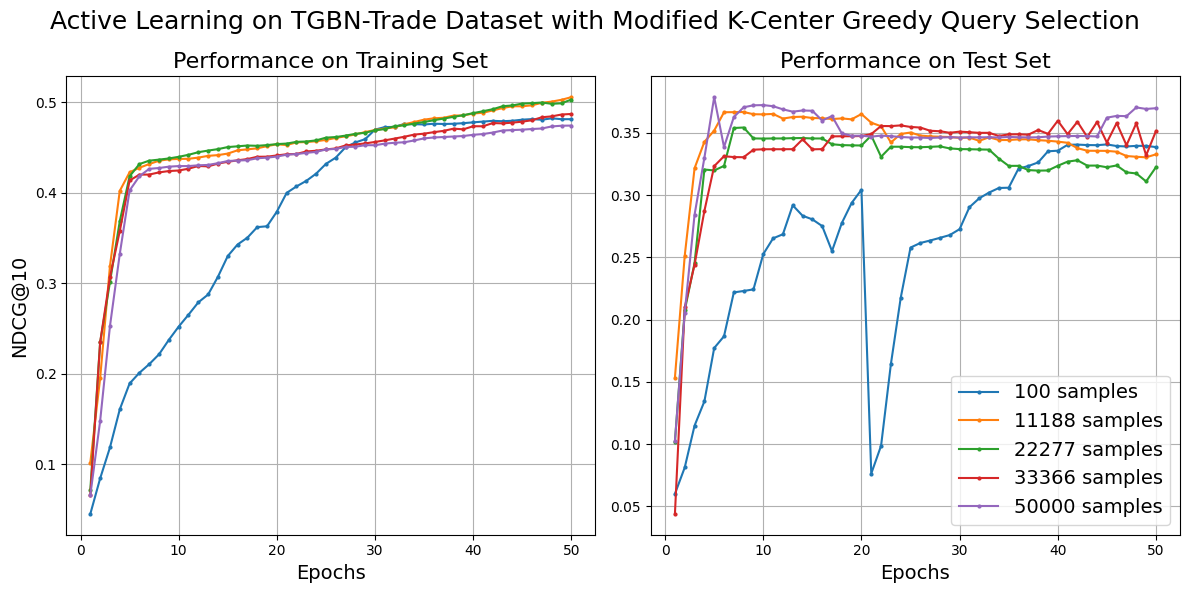

In [15]:
data = {}
data_dir = Path("data/")
fps = list(data_dir.glob("kcenter_greedy_epochs*samples.json"))

# Loop through files in the directory
for fp in fps:
    nsamples = fp.stem.split("_")[3].replace('samples', '')
    with open(fp, "r") as f:
        scores = json.load(f)
    data[int(nsamples)] = scores
data = dict(sorted(data.items()))
keys = list(data)
keys = keys[::2][:-1] + [keys[-1]]
data = {key: data[key] for key in keys}


plt.figure(figsize=(12, 6))

# Plot for train scores
plt.subplot(1, 2, 1)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['train_scores']) + 1)
    plt.plot(epochs, scores['train_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Training Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('NDCG@10', fontsize=14)
plt.grid()

# Plot for test scores
plt.subplot(1, 2, 2)
for nsamples, scores in data.items():
    epochs = range(1, len(scores['test_scores']) + 1)
    plt.plot(epochs, scores['test_scores'], marker='o', label=f'{nsamples} samples', markersize=2)
plt.title('Performance on Test Set', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

title = "Active Learning on TGBN-Trade Dataset with Modified K-Center Greedy Query Selection"
plt.suptitle(title, fontsize=18)
plt.tight_layout()

fp = result_figs / ("_".join(title.split(" "))+".png")
plt.savefig(fp, dpi=300)


plt.show()

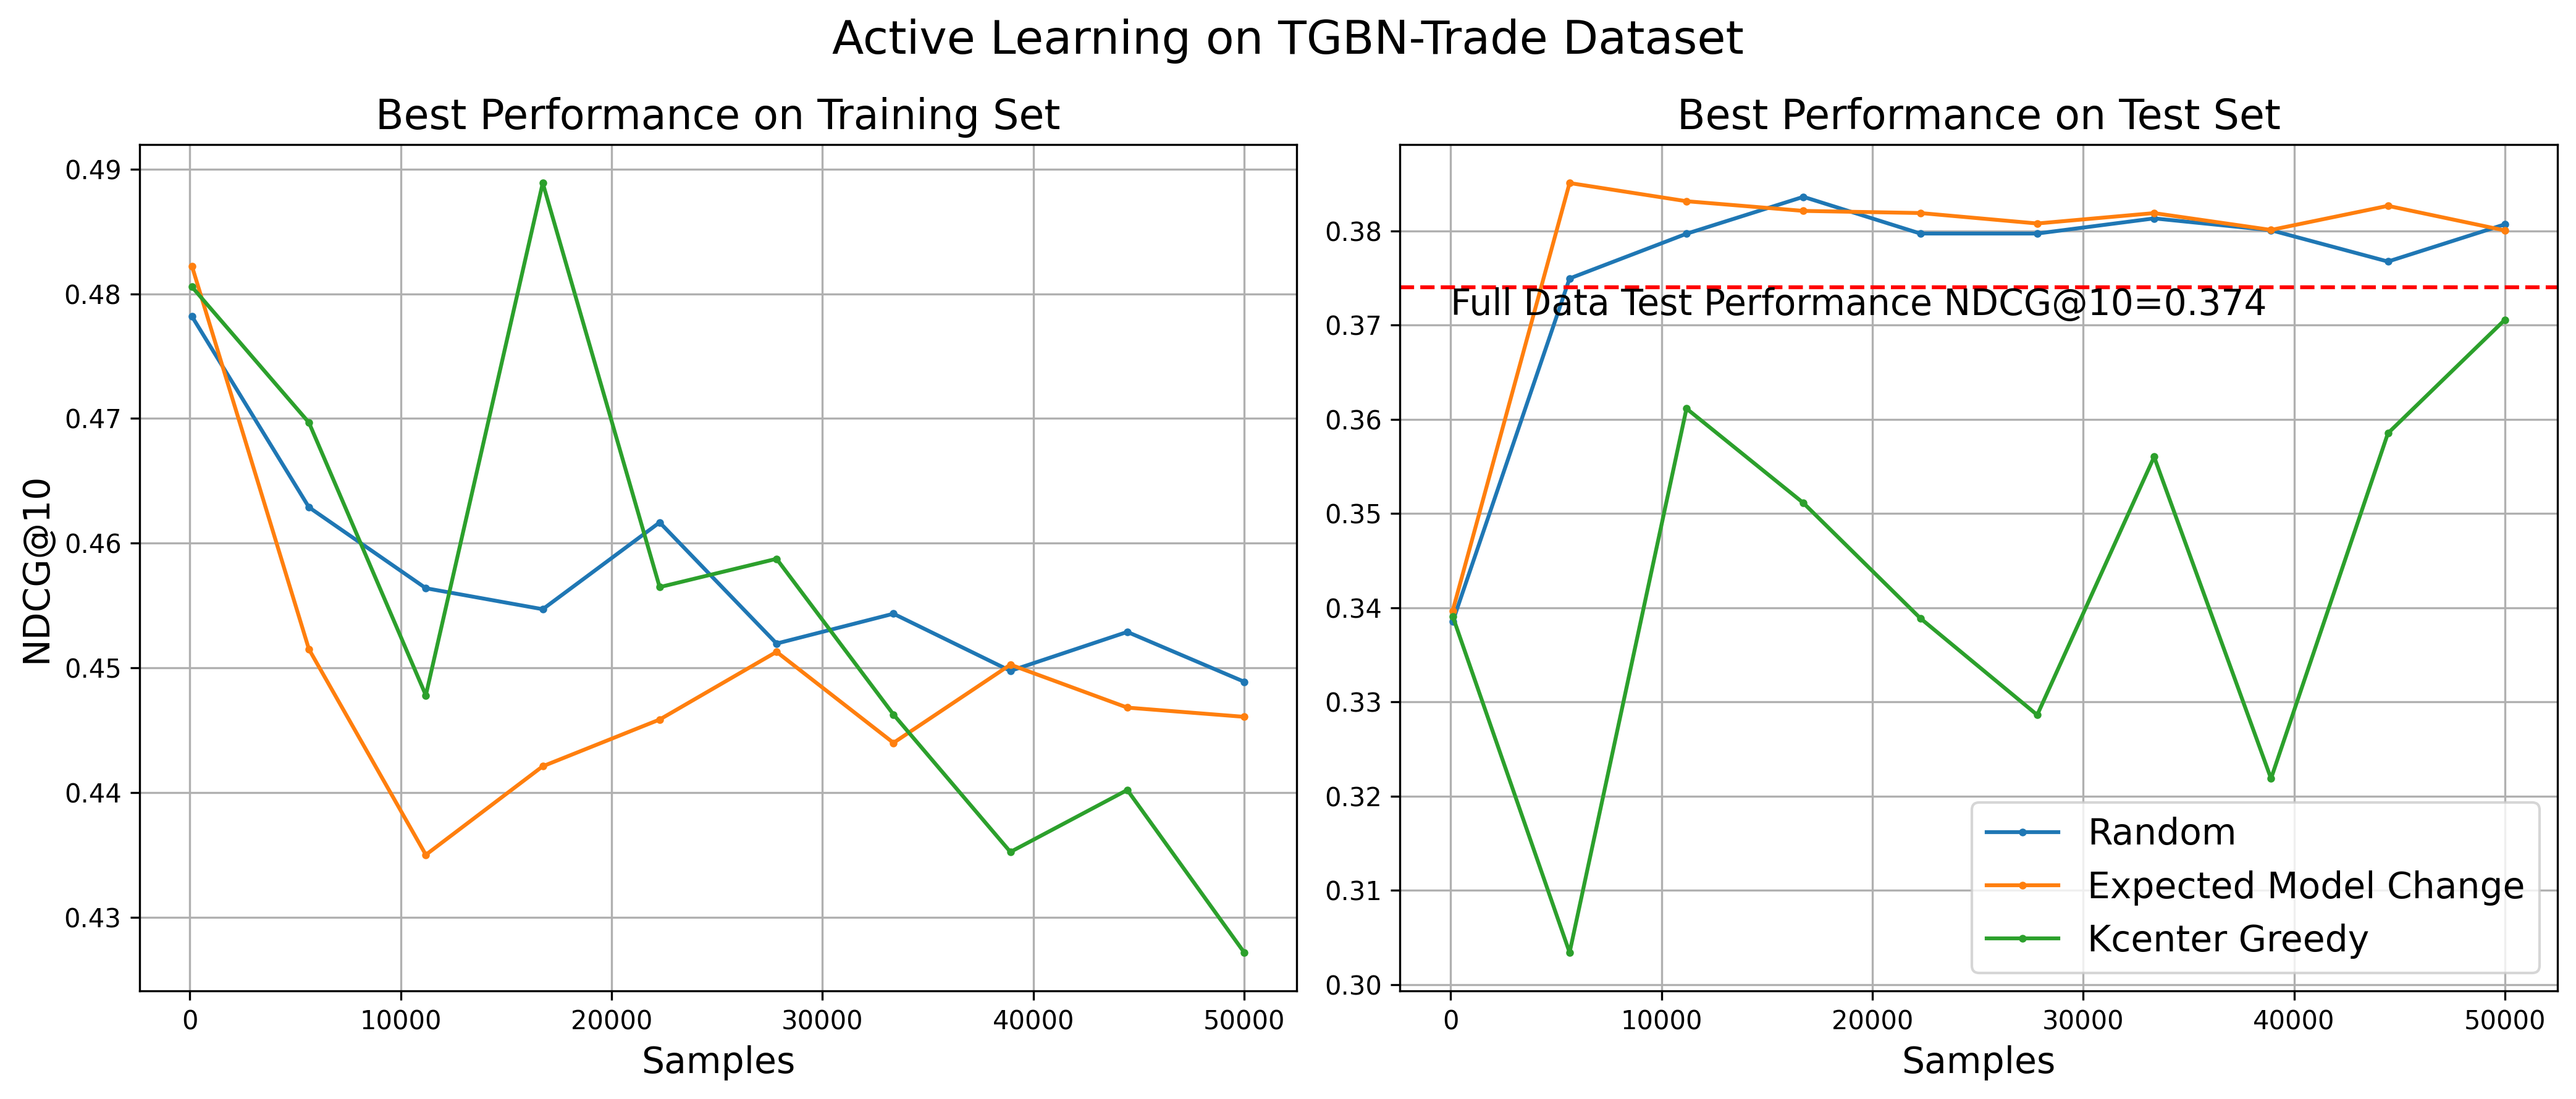

In [17]:
fp = Path("/home/srl72/palmer_scratch/TGB/data/random_expected_model_change_kcenter_greedy_10nsamples_50epochs_tgbn-trade_results.json")
with open(fp, "r") as f:
    data = json.load(f)

plt.figure(figsize=(14, 6), dpi=300)

n_samples_range = list(
        np.linspace(100, 50000, 10).astype(int)
    )

# Plot for train scores
plt.subplot(1, 2, 1)
for method, scores in data.items():
    method = " ".join(map(lambda x: x[0].upper()+x[1:], method.split("_")))
    plt.plot(n_samples_range, scores['max_train_score'], marker='o', label=f'{method}', markersize=2)
plt.title('Best Performance on Training Set', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.grid()
plt.ylabel('NDCG@10', fontsize=14)

plt.subplot(1, 2, 2)
for method, scores in data.items():
    method = " ".join(map(lambda x: x[0].upper()+x[1:], method.split("_")))
    plt.plot(n_samples_range, scores['max_test_score'], marker='o', label=f'{method}', markersize=2)
plt.title('Best Performance on Test Set', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
y_coord = 0.374
plt.axhline(y=y_coord, color="red", linestyle='--')
plt.annotate(f'Full Data Test Performance NDCG@10={y_coord}',xy=(0.5, y_coord),
             horizontalalignment='left', fontsize=14, verticalalignment='top')

title = "Active Learning on TGBN-Trade Dataset"
plt.suptitle(title, fontsize=18)
plt.tight_layout()


fp = result_figs / ("_".join(title.split(" "))+".png")
plt.savefig(fp, dpi=300)
plt.show()